<link rel="stylesheet" href="estilo.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Pré-Processamento de Dados
    
---

# Conteúdo

Pré-processamento de dados quantiativos e qualitativos

- Limpeza de dados
- Transformação de dados
    - Normalização de dados numéricos
    - Discretização de dados numéricos
    - Transformação de dados qualitativos em quantiativos
    - Outras transformações de dados
- Tratamento de dados desconhecidos

# Limpeza de dados

- A maior parte dos conjuntos de dados disponíveis para estudo, bem como os obtidos a partir de processos de coleta de dados, podem apresentar problemas, os quais dificultam a utilização desses dados em processos de mineração.

- Esses problemas pode ser: erros de digitação, erro na leitura de dados por sensores.

- Muitos dos processos de mineração aplicados não são usados apenas para estudo, mas os padrões encontrados podem ser usados em processos de mineração de dados. Por esse fato, é extremente importante a limpeza desses dados.

## Baseada em Conhecimento do domínio
- Uma estratégia para fazer limpeza de dados é **utilizar conhecimento do domínio**
- Determinados valores numéricos podem estar fora de um intervalo definido, conhecido do domínio.

- Um atributo idade deve conter valores entre 0 e 120 para domínio do problema. Se algum valor desse atributo está fora desse intervalo, temos que tomar uma decisão sobre ele: deixar ele como desconhecido (NaN no numpy), escolher algum valor para ele, ou tentar encontrar o valor verdadeiro baseado em outros atributos ou instâncias.

In [55]:
import numpy as np
idades = np.array([10,20,34,-25,50,165,71,55,30,34], dtype= np.float32)

In [56]:
desconhecido = np.NaN
idades = np.where( np.logical_or(idades < 0, idades > 120), desconhecido, idades)

In [57]:
idades

array([10., 20., 34., nan, 50., nan, 71., 55., 30., 34.], dtype=float32)

- Em outro exemplo, um atributo de data deve conter valores de data maiores do que 01/01/2010. Se algum valor desse atributo for menor do que essa data também temos que tomar uma decisão.

## Baseado em dados estatísticos
- Outra estratégia consiste em **utilizar estatística** para conhecer a distribuição dos dados e assim tomar decisões sobre quais valores estão fora do intervalo esperado.
- Uma variável contínua pode apresentar outliers estatísticos (pontos fora da curva) e se essa variável tem uma distribuição conhecida podemos tomar alguma decisão sobre o que fazer com esses valores: como deixar ele como desconhecido ou substituído pelo valor esperado (média na distribuição normal).

- Por exemplo, um atributo de temperatura possui um valor de média de 26 graus com desvio padrão de 2 graus. 
- Considerando uma distribuição normal espera-se que $68.25\%$ estejam a uma unidade de desvio-padrão e $99.73\%$ a três unidades.
- Se encontrar um valor acima de unidades de desvio padrão, por exemplo, 32 graus, podemos tomar alguma decisão com esse valor.

In [58]:
temperatura = np.array([26.6, 27.8, 25.6, 26.2, 120.0, 20.4, 29.4, 24.4, 26.9, 26.7])
media = 26
desvio = 2

In [59]:
temperatura = np.where( ( np.abs(temperatura - media)/desvio ) > 3, media, temperatura )

In [60]:
temperatura

array([26.6, 27.8, 25.6, 26.2, 26. , 20.4, 29.4, 24.4, 26.9, 26.7])

# Transformação de Dados

## Normalização de Dados Numéricos (ou Contínuos)

- A motivação da normalização é minimzar o problema da presença de variáveis em um conjunto de dados com dispersões de dados muito diferentes.

- Vários algoritmos de aprendizado, como Redes Neurais, Vizinhos mais Próximos e K-médias podem ser prejudicados por essa dispersão. 

- Por exemplo, ao medir a distância entre dois usários pela diferença entre seus valores tem-se:
    - Usuário 1 (salário = 1000, poupança = 20000)
    - Usuário 2 (salário = 1500, poupança = 50000)
    - Diferença  (salário = 500, poupança = 30000), Total (30500)
    - O problema que observamos é que a variável salário contribui muito menos para a soma das distâncias do que a variável poupança. 

- O objetivo da normalização é ajustar a escala dos valores dos atributos para que tenham dispersões ou intervalos mais similares.
- Métodos para normalização de dados numéricos:
    - Linear
    - Desvio-padrão
    - Valor máximo
    - Escala decimal

### Normalização Linear

- A normalização linear consiste em manter os dados no intervalo $[0,1]$. Para isso, usa-se uma função de transformação linear.

$$ f(x) = \frac{x - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})} = x'$$

- onde,
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado

### Normalização por Desvio-Padrão (z-score)

- A normalização desvio-padrão consiste em transformar os dados em unidades de desvio padrão em relação à média. Para isso, uma função de transformação baseada em média e desvio padrão.

$$ f(x) = \frac{x - mean(\mathbf{x})}{sd(\mathbf{x})} = x'$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado
    - $mean$ e $sd$ são a média e o desvio padrão dos valores

### Normalização de Valor Máximo

- A normalização usando o valor máximo consiste em manter os dados no intervalo $[-1,1]$. Para isso, uma função de transformação

$$ f(x) = \frac{x}{max(|\mathbf{x}|)} = x'$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado

### Normalização por Escala Decimal

- A normalização usando o valor por escala decimal consiste em manter os dados no intervalo $[-1,1]$. Para isso, uma função de transformação

$$ f(x) = \frac{x}{10^j} = x'$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado
    - $j$ é o menor inteiro tal que $max(|\mathbf{x}|) \leq 10^j$

### Exemplo no conjunto de dados Iris

In [61]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
data=pd.DataFrame(iris['data'], columns=iris['feature_names'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


- Estatísticas Descritivas

In [62]:
data.describe().round(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00000,150.00000,150.0000,150.00000
mean,5.84333,3.05733,3.7580,1.19933
std,0.82807,0.43587,1.7653,0.76224
min,4.30000,2.00000,1.0000,0.10000
25%,5.10000,2.80000,1.6000,0.30000
50%,5.80000,3.00000,4.3500,1.30000
75%,6.40000,3.30000,5.1000,1.80000
max,7.90000,4.40000,6.9000,2.50000


- Definição de uma função para normalização linear

In [63]:
def normalizacao_linear(x): 
    return (x - np.min(x)) / (np.max(x) - np.min(x));

- Aplicação da função em uma das colunas do conjunto de dados

In [64]:
new_data = normalizacao_linear( data['sepal length (cm)'] )
print('min: ', new_data.min())
print('max: ', new_data.max())
new_data

min:  0.0
max:  1.0


0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal length (cm), Length: 150, dtype: float64

- Aplicação da função em todas as colunas do conjunto de dados

In [65]:
new_data = data.apply(normalizacao_linear, axis = 0)
new_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [66]:
new_data.describe().round(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00000,150.00000,150.00000,150.00000
mean,0.42870,0.44056,0.46746,0.45806
std,0.23002,0.18161,0.29920,0.31760
min,0.00000,0.00000,0.00000,0.00000
25%,0.22222,0.33333,0.10169,0.08333
50%,0.41667,0.41667,0.56780,0.50000
75%,0.58333,0.54167,0.69492,0.70833
max,1.00000,1.00000,1.00000,1.00000


### Atividade

- Com o conjunto de dados *iris*, para cada atributo do conjunto de dados faça:
    - Normalização Linear
    - Normalização por Desvio-padrão
    - Normalização por Valor Máximo
    - Normalização por Escala Decimal

## Discretização de Dados Numéricos

- Alguns algoritmos de aprendizado trabalham apenas com dados discretos (ou categóricos), como o ID3 (Iterative Dichotomiser 3) desenvolvido por Ross Quinlan em 1986. Isto é, ao invés de utilizar o valor de, por exemplo, altura em metros ou centímetros, utilizam os valores baixo, médio, alto.

- Outros algoritmos podem ter desempenho melhor em alguns problemas se usada a representação discretazada de uma variável contínua, como no caso do algoritmo Naïve Bayes.

- Em algumas ocasiões o armazenamento de dados é feito com valores numéricos, embora indiquem informações categóricas, por exemplo um atributo gênero, onde o valor 0 indica masculino, 1 feminino e 2 outro.

- O objetivo da categorização consiste em transformar de valores numéricos para categóricos ou discretos.

- A idéia é perder a menor quantidade de informação possível para o domínio do problema, durante esse processo.

- As principais abordagens são:
    - Mapeamento Direto
    - Mapeamento em Intervalos

### Mapeamento Direto

- Neste tipo de discretização ocorre a substituição de valores numéricos por valores categóricos conhecidos no domínio do problema.

- Como o exemplo citado anteriormente, o atributo gênero pode ser armazenado como um valor numérico e o mesmo deve ser transformado, com o objetivo que, tanto as técnicas visualização, quanto os algoritmos de aprendizado não entendam esse atributo como numérico e sim como discreto.

- Vamos criar um vetor de dados para uma variável gênero, distribuída de forma uniforme entre os valores 0, 1 e 2.

In [67]:
np.random.seed(1)
genero =  np.random.randint(low = 0, high = 3, size=20)
genero

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0])

- Criamos um DataFrame a partir dessa coluna

In [68]:
df = pd.DataFrame( {'genero' : genero} )
df

,genero
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


- Vamos acessar a coluna `genero` e executar a função `replace` que recebe as substituições como parâmetro.

In [69]:
to_replace = {0 : 'Masculino', 1 : 'Feminino', 2 : 'Outro'}
df['genero_categoria'] = df.genero.replace(to_replace)
df

,genero,genero_categoria
0,1,Feminino
1,0,Masculino
2,0,Masculino
3,1,Feminino
4,1,Feminino
5,0,Masculino
6,0,Masculino
7,1,Feminino
8,0,Masculino
9,1,Feminino


- Em geral cria-se uma variável que armazena essa informações. Essa variável chamada de dicionário (tipo dict).

In [70]:
to_replace = {
    0 : 'Masculino',
    1 : 'Feminino',
    2 : 'Outro'
}
print(to_replace)
print('type: ', type(to_replace) )

{0: 'Masculino', 1: 'Feminino', 2: 'Outro'}
type:  <class 'dict'>


- Podemos passar essa variável `to_replace` como argumento do parâmetro `to_replace` da função `replace`.

In [71]:
df['genero_categoria'] = df.genero.replace(to_replace = to_replace)
df

,genero,genero_categoria
0,1,Feminino
1,0,Masculino
2,0,Masculino
3,1,Feminino
4,1,Feminino
5,0,Masculino
6,0,Masculino
7,1,Feminino
8,0,Masculino
9,1,Feminino


- Uma segunda forma de fazer isso é definir uma função `get_categoria_genero` que é responsável por receber um valor da variável (0, 1 ou 2) e retorna o valor correspondente. Duas implementações dessa função são apresentadas a seguir:

In [72]:
def get_categoria_genero(x) :
    if (x == 0) :
        return 'Masculino'
    elif (x == 1) :
        return 'Feminino'
    elif (x == 2) :
        return 'Outro'
    
get_categoria_genero(1)

'Feminino'

In [73]:
def get_categoria_genero(x) :
    dict_genero = {0 : 'Masculino', 1 : 'Feminino', 2 : 'Outro'}
    return dict_genero[x]

get_categoria_genero(0)

'Masculino'

- Aplicamos essa função na coluna `genero` armazenamos o resultado na coluna `genero_categoria_2`.

In [74]:
df['genero_categoria_2'] = df.genero.apply(get_categoria_genero)
df

,genero,genero_categoria,genero_categoria_2
0,1,Feminino,Feminino
1,0,Masculino,Masculino
2,0,Masculino,Masculino
3,1,Feminino,Feminino
4,1,Feminino,Feminino
5,0,Masculino,Masculino
6,0,Masculino,Masculino
7,1,Feminino,Feminino
8,0,Masculino,Masculino
9,1,Feminino,Feminino


### Mapeamento em Intervalos

- Intervalos pré-definidos
- Intervalos de igual tamanho
- Intervalos de igual frequência

#### Intervalos Pré-definidos

- Neste tipo de intervalo, coleta-se informação do domínio para poder realizar a discretização

- Por exemplo, ao discretizar valores de idade em faixas etárias, embora possamos definir os intervalos arbitrariamente (nós mesmos) existe conhecimento do domínio que permite definir esses intervalos.
    - Intervalo 0 (de 0 a 12 anos incompletos)
    - Intervalo 1 (de 12 anos a 18 anos incompletos)
    - Intervalo 2 (de 18 anos a 40 anos incompletos)
    - Intervalo 3 (de 40 anos a 60 anos incompletos)
    - Intervalo 4 (de 60 anos ou mais)

In [75]:
np.random.seed(1)
idade =  np.random.randint(low = 0, high = 100, size=20)
df = pd.DataFrame({'idade' : idade})
df

,idade
0,37
1,12
2,72
3,9
4,75
5,5
6,79
7,64
8,16
9,1


In [76]:
def get_discretized_idade (x) :
    if (x < 12) :
        return 0
    elif (x < 18) :
        return 1
    elif (x < 40) :
        return 2
    elif (x < 60) :
        return 3
    else :
        return 4

In [77]:
df['idade_discretizado'] = df.idade.apply(get_discretized_idade)
df

,idade,idade_discretizado
0,37,2
1,12,1
2,72,4
3,9,0
4,75,4
5,5,0
6,79,4
7,64,4
8,16,1
9,1,0


### Intervalos de Igual Tamanho (ou largura fixa)

- Ao se conhecer os valores máximos e mínimos do domínio de uma variável, seja por conhecimento do domínio ou pela aplicação de técnicas estatísticas, podemos dividir o intervalo total dos dados em $k$ tamanhos iguais.

$$L = \frac{max(\mathbf{x}) - min(\mathbf{x}) + 1}{k}$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável    
    - $k$ é o número de intervalos
    - $L$ é a largura do intervalo

- Por exemplo, se os valores vão de 1 a 100 e queremos dividir esses valores em 4 intervalos de tamanho igual, o tamanho do intervalo é 25, pois $\frac{(100-1+1)}{4} = 25$

- Assim, os intervalos podem ser definidos da seguinte por,

$$ I_i = [(min(\mathbf{x}) + L \times i),\;(min(\mathbf{x}) + L \times (i+1) - 1],\\ \text{para}\;1 \leq i < k $$

- O que resulta nos seguintes intervalos de 1 a 100

$$ 
 \begin{matrix}
  I_0 =& [(1 + 25 \times 0),(1 + 25 \times (0+1) - 1)]) =& [1,25] \\
  I_1 =& [(1 + 25 \times 1),(1 + 25 \times (1+1) - 1)]) =& [26,50] \\
  I_2 =& [(1 + 25 \times 2),(1 + 25 \times (2+1) - 1)]) =& [51,75] \\
  I_3 =& [(1 + 25 \times 3),(1 + 25 \times (3+1) - 1)]) =& [76,100] \\
  \end{matrix}
$$

- Vamos construir um conjunto de dados de 500 valores de idade entre 1 e 100.

In [78]:
np.random.seed(1)
idade =  np.random.randint(low = 1, high = 101, size=500)
print(idade)

[ 38  13  73  10  76   6  80  65  17   2  77  72   7  26  51  21  19  85
  12  29  30  15  51  69  88  88  95  97  87  14  10   8  64  62  23  58
   2   1  61  82   9  89  14  48  73  31  72   4  71  22  50  58   4  69
  25  44  77  27  53  81  42  83  16  65  69  26  99  88   8  27  26  23
  10  68  24  28  38  58  84  39   9  33  35  11  24  16  88  26  72  93
  75  63  47  33  89  24  56  66  78   4   1  78   7  53  86  71   3  77
  92  22  76   8  78  73  76  77  44  21  31  37   8  46  69  58  83  97
  14  11  24  82   8  25  75  93  21  33  13  66  95  61  25  83  98   3
  93  99  11  55  97  83  87  71  67  72  49  55  16   6  18  43  21  49
  23  14  98  54  85  11  97  56  62  57  90  22  97  84  26  15  14  85
  44   7  78  57  60  16  25  10  67  72  54  70  37  22  41  78  92  50
  48  78  41  79  46  88  17  29  46  68  67  79  47   1  30  64  76  36
  54  94  34   3  85  84  49  55  33  29  56  83  32  29  95  75   9 100
  33   9  85  78  51  80  42  65  84  25  21  45  1

- Calculamos a largura do intervalo $L$ conforme a equação:

$$L = \frac{max(\mathbf{x}) - min(\mathbf{x}) + 1}{k}$$

In [79]:
k = 4
L = (max(idade) - min(idade) + 1) / k
print(L)

25.0


In [80]:
intervalos = (idade - min(idade)) // L
intervalos_largura_fixa = intervalos.astype(int)
intervalos_largura_fixa

array([1, 0, 2, 0, 3, 0, 3, 2, 0, 0, 3, 2, 0, 1, 2, 0, 0, 3, 0, 1, 1, 0,
       2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 3, 0, 3, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 3, 1, 2, 3, 1, 3, 0, 2, 2, 1,
       3, 3, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 3, 1, 0, 1, 1, 0, 0, 0, 3, 1,
       2, 3, 2, 2, 1, 1, 3, 0, 2, 2, 3, 0, 0, 3, 0, 2, 3, 2, 0, 3, 3, 0,
       3, 0, 3, 2, 3, 3, 1, 0, 1, 1, 0, 1, 2, 2, 3, 3, 0, 0, 0, 3, 0, 0,
       2, 3, 0, 1, 0, 2, 3, 2, 0, 3, 3, 0, 3, 3, 0, 2, 3, 3, 3, 2, 2, 2,
       1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 3, 2, 3, 0, 3, 2, 2, 2, 3, 0, 3, 3,
       1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 0, 1, 1, 2, 2, 3, 1, 0, 1, 2, 3, 1, 2, 3, 1, 0,
       3, 3, 1, 2, 1, 1, 2, 3, 1, 1, 3, 2, 0, 3, 1, 0, 3, 3, 2, 3, 1, 2,
       3, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 0, 3, 2, 1, 2, 1, 1, 0, 2, 0, 3,
       3, 1, 1, 0, 3, 2, 3, 1, 1, 2, 2, 3, 3, 1, 0, 2, 2, 2, 3, 0, 1, 1,
       3, 1, 0, 1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 2, 0,

In [81]:
from collections import Counter
Counter(intervalos_largura_fixa)

Counter({1: 124, 0: 133, 2: 111, 3: 132})

#### Intervalos de Igual Frequência

- Neste tipo de discretização a ideia consiste em manter o mesmo número de valores (ou exemplos) em cada intervalo.

- Considerando $k$ o número de intervalos e $n$ o número de exemplos:
    1. Calculamos $N$, o número de exemplos por intervalo, como $N = \frac{n}{k}$
    - Calculamos o ranking dos valores da variável $\mathbf{x}$ 
    - Aplicamos o método de discretização de igual tamanho sobre o ranking dos elementos

In [82]:
k = 4
N = np.round(len(idade) / k)

from scipy.stats import rankdata
x = rankdata(idade)

L = (np.max(x) - np.min(x) + 1) / k
intervalos = (x - np.min(x)) // L

intervalos_igual_frequencia = intervalos.astype(int)
print(intervalos_igual_frequencia)

[1 0 2 0 2 0 3 2 0 0 3 2 0 1 2 0 0 3 0 1 1 0 2 2 3 3 3 3 3 0 0 0 2 2 0 2 0
 0 2 3 0 3 0 1 2 1 2 0 2 0 2 2 0 2 1 1 3 1 2 3 1 3 0 2 2 1 3 3 0 1 1 0 0 2
 0 1 1 2 3 1 0 1 1 0 0 0 3 1 2 3 2 2 1 1 3 0 2 2 3 0 0 3 0 2 3 2 0 3 3 0 2
 0 3 2 2 3 1 0 1 1 0 1 2 2 3 3 0 0 0 3 0 1 2 3 0 1 0 2 3 2 1 3 3 0 3 3 0 2
 3 3 3 2 2 2 1 2 0 0 0 1 0 1 0 0 3 2 3 0 3 2 2 2 3 0 3 3 1 0 0 3 1 0 3 2 2
 0 1 0 2 2 2 2 1 0 1 3 3 2 1 3 1 3 1 3 0 1 1 2 2 3 1 0 1 2 2 1 2 3 1 0 3 3
 1 2 1 1 2 3 1 1 3 2 0 3 1 0 3 3 2 3 1 2 3 1 0 1 0 1 3 0 0 1 3 0 3 2 1 2 1
 1 0 2 1 3 3 1 1 0 3 2 3 1 1 2 2 3 3 1 0 2 2 2 3 0 1 1 3 1 0 1 1 2 3 2 1 1
 2 2 1 2 0 3 0 0 0 3 2 0 2 0 0 2 0 1 0 2 3 3 1 2 3 2 0 3 0 1 2 3 2 3 1 1 1
 0 3 2 3 0 2 1 3 2 3 1 1 3 1 3 2 3 1 1 1 2 2 2 2 3 1 1 0 3 3 3 1 3 1 2 0 3
 2 0 2 0 1 3 1 2 2 0 1 0 0 2 3 3 2 0 1 2 3 3 3 3 0 1 0 1 3 2 1 1 3 0 3 3 1
 1 3 1 2 1 0 3 0 1 1 1 0 3 1 2 1 3 0 3 1 3 2 2 1 1 0 2 0 3 1 0 0 0 3 0 3 2
 1 2 1 3 2 0 0 3 2 1 0 1 1 2 3 2 1 0 3 0 1 0 2 0 1 0 1 1 1 0 2 3 2 0 0 1 0
 1 2 0 3 0 1 3 2 2 2 3 3 

In [83]:
from collections import Counter
Counter(intervalos_igual_frequencia)

Counter({1: 127, 0: 127, 2: 121, 3: 125})

In [84]:
df = pd.DataFrame({ "idade" : idade, "rank" : x, "intervalo" : intervalos_igual_frequencia} )
df

,idade,rank,intervalo
0,38,200.5,1
1,13,60.5,0
2,73,360.0,2
3,10,43.5,0
4,76,372.0,2
5,6,22.0,0
6,80,399.5,3
7,65,320.5,2
8,17,86.5,0
9,2,7.0,0


## Transformação de Dados Qualitativos em Quantitativos

- Alguns algoritmos tem preferência por representações numéricas para atributos qualitativos, como as Redes Neurais.

- Os atributos qualitativos (ou categóricos) podem ser:
    - Ordinais: os seus valores possuem uma ordem, como avaliação: ruim, regular, bom e ótimo.
    - Nominais: os seus valores não possuem uma ordem, como cores, estado civil, e outros.

### Mapeamento Direto
- Para atributos nominais não é recomendado, pois pode inserir informações incorretas para o processo de aprendizado.
- Para os atributos ordinais é possível transformar os dados para números inteiros.
- Para isso, ordenamos os possíveis valores em ordem crescente, e atribuímos valores em ordem crescente aos possíveis valores, geralmente iniciando em 0 ou 1.
- Por exemplo, para a variável avaliação

|Valor | Mapeamento |
|------|------|
| ruim | 0 |
| regular | 1 |
| bom | 2 | 
| ótimo | 3 |

### Representação Binária

- Neste tipo de representação cada valor corresponde a uma sequência binária única.

- Em geral, usa-se a representação *One-Hot* que ativa um bit exclusivamente para cada valor da variável.

- Por exemplo, para o caso da variável ordinal *avaliação*:

|Valor | Mapeamento |
|------|------|
| ruim | 0001 |
| regular | 0010 |
| bom | 0100 | 
| ótimo | 1000 |

- Por exemplo, para a variável nominal *estado civil*:

|Valor | Mapeamento |
|------|------|
| casado | 00001 |
| solteiro | 00010 |
| viúvo | 00100 | 
| divorciado | 01000 |
| outro | 10000 |

- A representação binária é comumente utilizada para codificar variáveis em Redes Neurais.

### Outras Transformações de Dados

- Existem outras transformações dependentes da natureza do dado e da informação que queremos estudar.

- Por exemplo, se temos uma variável *data de nascimento*. Se estamos interessados em analisar o valor da idade, a data de nascimento não será suficiente para um método de aprendizado entender o que nós queremos.

- A data é um bom exemplo de tipo de dados complexo, pois tem várias informações contidas nesse tipo de dado e várias informações podem ser extraída a partir dele: idade, ano, mes, dia, estação do ano, dia da semana, final de semana, entre outras.

- Como já mencionado, os dados podem vir em qualquer formato, e como vão ser usados esses dados para visualização ou por algoritmo de aprendizado, vai depender de quem está realizando o processo de mineração.

## Tratamento de Dados Desconhecidos

- Um problema comum em conjunto de dados é a presença de dados desconhecidos

- Geralmente sinalizados com: ?, NA, ou a ausência de valor mesmo

- A substituição de um valor ausente ou desconhecido é tambem conhecida como *imputação* de valores.

- Bibliografias sobre imputação de valores:

> CASTRO, Leandro Nunes de. Introdução à mineração de dados: conceitos básicos, algoritmos e aplicações. São Paulo: Saraiva, 2016. 351 p., il. ISBN 9788547200985. Seção 2.3

> Data Mining: Concepts and Techniques, 3rd Edition. Jiawei Han, Micheline Kamber, Jian Pei. Database Modeling and Design: Logical Design, 5th Edition. Capítulo 3


Abordagens comuns de acordo com (Castro e Ferrari, 2016):
- Ignorar as instâncias que possuem um ou mais valores ausentes;
- Imputar manualmente valores ausentes
- Usar uma constante global para imputar o valor ausente: para cada atributo escolhe-se um valor para cada atributo
- Imputação do tipo *hot-deck* ou baseada no objeto mais similar

- Imputar de acordo com a última obervação: os registros são ordenados de acordo com algum critério razoável para o domínio do problema e o valor ausente é preenchido, baseado no registro imediamente anterior
- Imputar de acordo com a média ou moda do atributo
- Imputar de acordo com a média ou moda do atributo para cada classe: no caso de aprendizado superivsionado
 Imputar de acordo com modelos preditivos

- Imputar usando modelos preditivos: consiste em efetuar um aprendizado supervisionado sobre esse atributo para aprender sua relação com os outros atributos:
    - Modelo de classificação, quando o atributo com valor desconhecido é categórico.
    - Modelo de regressão, quando o atributo com valor desconhecido é numérico.
- Após, usa-se o modelo para predizer o valor desconhecido.
- Por exemplo, no conjunto de dados *iris*, vamos retirar 30 valores da coluna *petal length (cm)*

- Conjunto de Dados Original

In [85]:
data=pd.DataFrame(iris['data'], columns=iris['feature_names'], copy=True)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


- Índices para remover (*to_remove*) escolhidos aleatoriamente:

In [86]:
import random
random.seed(1)
to_remove = random.sample(range(0,150), 30)
print(to_remove)

[34, 145, 16, 65, 30, 126, 115, 120, 97, 53, 24, 124, 7, 99, 110, 0, 114, 68, 58, 26, 81, 137, 5, 3, 83, 69, 1, 142, 112, 48]


- Armazenamos em uma variável os valores antes de serem removidos

In [87]:
missing_true = data.loc[to_remove,'petal length (cm)'].values
print(missing_true)

data.loc[to_remove,'petal length (cm)'] = None

[1.5 5.2 1.3 4.4 1.6 4.8 5.3 5.7 4.3 4.  1.9 5.7 1.5 4.1 5.1 1.4 5.1 4.5
 4.6 1.6 3.7 5.5 1.7 1.5 5.1 3.9 1.4 5.1 5.5 1.5]


- Conjunto de dados, com valores removidos

In [88]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,NaN,0.2
1,4.9,3.0,NaN,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,NaN,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,NaN,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,NaN,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


- Vamos separar as instâncias que conhecemos os valores de todos os atributos (*train*) e as instâncias que possuem os valores ausentes (*missing*)

In [89]:
train = data.drop(to_remove, axis=0)
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
4,5.0,3.6,1.4,0.2
6,4.6,3.4,1.4,0.3
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [90]:
missing = data.loc[to_remove,:]
missing.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
34,4.9,3.1,NaN,0.2
145,6.7,3.0,NaN,2.3
16,5.4,3.9,NaN,0.4
65,6.7,3.1,NaN,1.4
30,4.8,3.1,NaN,0.2


- A partir do conjunto *train* vamos construir uma regressão para predizer a variável resposta ou *target* 'petal length (cm)' utilizando os outros três atributos.

- Ajustar uma função na forma $y = f(X)$,
    - $y$ é a variável resposta ou *target*. `y_train` representa $y$.
    - $X$ são outros três atributos que *podem* nos ajudar a prever $y$. `X_train` representa `X`.

In [91]:
target = 'petal length (cm)'
y_train = train[target]
X_train = train.drop(target, axis=1)

- Instanciamos um regressor linear e ajustamos a regressão aos dados.

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)

Coeficientes:  [ 0.70969251 -0.62139171  1.50256363]
Intercepto:  -0.27128316566803523


In [94]:
def regression_to_equation (columns, coefs, intercept, nround = 3):
    coefs = np.round(coefs, nround).astype(str)    
    intercept = np.round(intercept, nround).astype(str)    
    str1 = " + ".join( [(coef + ' x '+ column) for column, coef in zip(columns, coefs)] )        
    return 'y = ' + str1 + ' + ' + intercept;

In [95]:
regression_to_equation(X_train.columns, model.coef_, model.intercept_)

'y = 0.71 x sepal length (cm) + -0.621 x sepal width (cm) + 1.503 x petal width (cm) + -0.271'

- Agora vamos tentar adivinhar os valores ausentes

In [96]:
X_missing = missing.drop(target, axis=1)

y_missing_pred = model.predict(X_missing)
y_missing_pred

array([1.58040857, 6.07537789, 1.73865418, 4.66093145, 1.50943932,
       5.09352816, 5.7381918 , 6.09303805, 4.28010717, 4.15615744,
       1.3230218 , 5.58844765, 1.46496031, 3.98740009, 5.35839196,
       1.47379039, 5.71118934, 5.0155941 , 4.56398418, 1.76547303,
       3.64324918, 5.04904915, 1.73865418, 1.36750081, 4.7132161 ,
       3.80233562, 1.64254774, 5.02204669, 5.84583442, 1.49145055])

In [97]:
missing_true

array([1.5, 5.2, 1.3, 4.4, 1.6, 4.8, 5.3, 5.7, 4.3, 4. , 1.9, 5.7, 1.5,
       4.1, 5.1, 1.4, 5.1, 4.5, 4.6, 1.6, 3.7, 5.5, 1.7, 1.5, 5.1, 3.9,
       1.4, 5.1, 5.5, 1.5])

- Comparamos os valores preditos com os observados (aqueles que nós removemos inicialmente)

In [98]:
results = pd.DataFrame({ 'missing_true': missing_true, 'y_missing_pred' : y_missing_pred })
results

,missing_true,y_missing_pred
0,1.5,1.580409
1,5.2,6.075378
2,1.3,1.738654
3,4.4,4.660931
4,1.6,1.509439
5,4.8,5.093528
6,5.3,5.738192
7,5.7,6.093038
8,4.3,4.280107
9,4.0,4.156157


- Visualização usando Scatter Plot

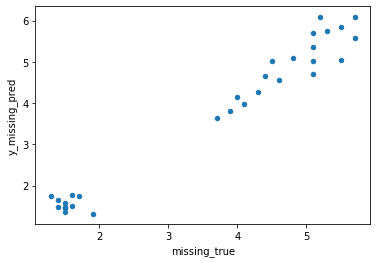

In [99]:
results.plot.scatter(x = 'missing_true', y = 'y_missing_pred')

- Coeficiente de Correlação de Pearson, $R$

In [100]:
r = np.corrcoef(results['missing_true'],results['y_missing_pred']) 
r[0,1]

0.9850004515270024

- Coeficiente de Determinação, $R^2$

In [101]:
r[0,1]**2

0.9702258895083987

- Erro Médio Quadrático, $EMQ$

In [102]:
np.mean((results['missing_true'] - results['y_missing_pred'])**2)

0.10559228954055062

- Imputação dos valores ausentes no conjunto de dados

In [103]:
predicted = model.predict( data[data[target].isna()].drop(target,axis=1) )

data.loc[data[target].isna(), target] = np.round(predicted,1)

In [104]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.5,0.2
1,4.9,3.0,1.6,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.4,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Tarefa:
- Verifique se o modelo construído com regressão linear é melhor do que usar imputação de valores ausentes usando a média. Implemente esse modelo e justificar a sua resposta comparando o coeficiente de correlação e o erro médio quadrático.

- Crie uma função que preencha os dados desconhecidos de um conjunto de dados:
    - Input: conjunto de dados, nome da variável target
    - Process: construir um regressor linear e imputar os valores ausentes da variável target
    - Output: o conjunto de dados pós-imputação de valores